In [1]:
import numpy as np


In [3]:
!pip install pandas

import pandas as pd


     |████████████████████████████████| 10.2MB 6.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl


In [4]:
import matplotlib.pyplot as plt


In [6]:
!pip install seaborn
import seaborn as sns

     |████████████████████████████████| 215kB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 27.7MB 14.1MB/s eta 0:00:01


In [16]:
def get_datasets():
  # Load the csv files from the source in the Barcelona Open Portal
  url_2015 = "https://opendata-ajuntament.barcelona.cat/data/dataset/79bdf758-dae1-485b-800c-be9f8cfa9360/resource/bb4de997-cdf9-43ad-98c6-cc3a3e4d4f07/download/2015_distribucio_territorial_renda_familiar.csv"
  url_2016 = "https://opendata-ajuntament.barcelona.cat/data/dataset/79bdf758-dae1-485b-800c-be9f8cfa9360/resource/1d9ff171-6f23-45c1-b02f-203b0589f08a/download/2016_distribucio_territorial_renda_familiar.csv"
  data_2015 = pd.read_csv(url_2015)
  data_2016 = pd.read_csv(url_2016)

# Extract input lists for the analysis 
  inhabitants_per_neihborhood_15 = data_2015['Població'].tolist()
  inhabitants_per_district_15 = data_2015[['Nom_Districte', 'Població']].groupby(['Nom_Districte'], as_index=False).sum()['Població']
  inhabitants_per_neihborhood_16 = data_2016['Població'].tolist()
  inhabitants_per_district_16 = data_2016[['Nom_Districte', 'Població']].groupby(['Nom_Districte'], as_index=False).sum()['Població']
  
  return inhabitants_per_neihborhood_15, inhabitants_per_neihborhood_16, inhabitants_per_district_15, inhabitants_per_district_16

In [17]:
inhabitants_per_neihborhood_15, inhabitants_per_neihborhood_16, inhabitants_per_district_15, inhabitants_per_district_16 = get_datasets()

In [19]:
#Exercise 1. What is the difference between the average number of inhabitants per neighborhood in Barcelona 
#between 2015 and 2016? What about the difference between the average of each year when considesidering 
#the population per district?

In [44]:
# 
url_2015 = "https://opendata-ajuntament.barcelona.cat/data/dataset/79bdf758-dae1-485b-800c-be9f8cfa9360/resource/bb4de997-cdf9-43ad-98c6-cc3a3e4d4f07/download/2015_distribucio_territorial_renda_familiar.csv"
url_2016 = "https://opendata-ajuntament.barcelona.cat/data/dataset/79bdf758-dae1-485b-800c-be9f8cfa9360/resource/1d9ff171-6f23-45c1-b02f-203b0589f08a/download/2016_distribucio_territorial_renda_familiar.csv"
data_2015 = pd.read_csv(url_2015)
data_2016 = pd.read_csv(url_2016)
data_2015.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Índex RFD Barcelona = 100
0,2015,1,Ciutat Vella,1,el Raval,47617,75.8
1,2015,1,Ciutat Vella,2,el Barri Gòtic,15269,108.5
2,2015,1,Ciutat Vella,3,la Barceloneta,15036,76.6
3,2015,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22305,96.4
4,2015,2,Eixample,5,el Fort Pienc,31645,104.8


In [51]:
#create a new dataframe for both the 2015 and 2016 to find difference between the barrios. 
df_all = pd.concat([data_2015.set_index('Nom_Barri'), data_2016.set_index('Nom_Barri')], 
                   axis='columns', keys=['2015', '2016'], sort=False)
df_all.head()

2015                               \
                                        Any Codi_Districte Nom_Districte   
el Raval                               2015              1  Ciutat Vella   
el Barri Gòtic                         2015              1  Ciutat Vella   
la Barceloneta                         2015              1  Ciutat Vella   
Sant Pere, Santa Caterina i la Ribera  2015              1  Ciutat Vella   
el Fort Pienc                          2015              2      Eixample   

                                                           \
                                      Codi_Barri Població   
el Raval                                       1    47617   
el Barri Gòtic                                 2    15269   
la Barceloneta                                 3    15036   
Sant Pere, Santa Caterina i la Ribera          4    22305   
el Fort Pienc                                  5    31645   

                                                                   2016  \
                                      Índex RFD Barcelona = 100     Any   
el Raval                                                   75.8  2016.0   
el Barri Gòtic                                            108.5  2016.0   
la Barceloneta                                             76.6  2016.0   
Sant Pere, Santa Caterina i la Ribera                      96.4  2016.0   
el Fort Pienc                                             104.8  2016.0   

                                                                               \
                                      Codi_Districte Nom_Districte Codi_Barri   
el Raval                                         1.0  Ciutat Vella        1.0   
el Barri Gòtic                                   1.0  Ciutat Vella        2.0   
la Barceloneta                                   1.0  Ciutat Vella        3.0   
Sant Pere, Santa Caterina i la Ribera            1.0  Ciutat Vella        4.0   
el Fort Pienc                                    2.0      Eixample        5.0   

                                                                          
                                      Població Índex RFD Barcelona = 100  
el Raval                               47274.0                      74.6  
el Barri Gòtic                         15729.0                     110.5  
la Barceloneta                         15068.0                      84.8  
Sant Pere, Santa Caterina i la Ribera  22380.0                      97.8  
el Fort Pienc                          31693.0                     105.0

In [56]:
#compare the population by neighbourhood, adding a column for difference
df_all['difference'] = df_all['2015']['Població'] - df_all['2016']['Població']
df_all.head()

2015                               \
                                        Any Codi_Districte Nom_Districte   
el Raval                               2015              1  Ciutat Vella   
el Barri Gòtic                         2015              1  Ciutat Vella   
la Barceloneta                         2015              1  Ciutat Vella   
Sant Pere, Santa Caterina i la Ribera  2015              1  Ciutat Vella   
el Fort Pienc                          2015              2      Eixample   

                                                           \
                                      Codi_Barri Població   
el Raval                                       1    47617   
el Barri Gòtic                                 2    15269   
la Barceloneta                                 3    15036   
Sant Pere, Santa Caterina i la Ribera          4    22305   
el Fort Pienc                                  5    31645   

                                                                   2016  \
                                      Índex RFD Barcelona = 100     Any   
el Raval                                                   75.8  2016.0   
el Barri Gòtic                                            108.5  2016.0   
la Barceloneta                                             76.6  2016.0   
Sant Pere, Santa Caterina i la Ribera                      96.4  2016.0   
el Fort Pienc                                             104.8  2016.0   

                                                                               \
                                      Codi_Districte Nom_Districte Codi_Barri   
el Raval                                         1.0  Ciutat Vella        1.0   
el Barri Gòtic                                   1.0  Ciutat Vella        2.0   
la Barceloneta                                   1.0  Ciutat Vella        3.0   
Sant Pere, Santa Caterina i la Ribera            1.0  Ciutat Vella        4.0   
el Fort Pienc                                    2.0      Eixample        5.0   

                                                                          \
                                      Població Índex RFD Barcelona = 100   
el Raval                               47274.0                      74.6   
el Barri Gòtic                         15729.0                     110.5   
la Barceloneta                         15068.0                      84.8   
Sant Pere, Santa Caterina i la Ribera  22380.0                      97.8   
el Fort Pienc                          31693.0                     105.0   

                                      difference  
                                                  
el Raval                                   343.0  
el Barri Gòtic                            -460.0  
la Barceloneta                             -32.0  
Sant Pere, Santa Caterina i la Ribera      -75.0  
el Fort Pienc                              -48.0

In [41]:
#another way of doing this, but returns only a list of the differences, without information regarding the neighbourhood
[x1 - x2 for (x1, x2) in zip(inhabitants_per_neihborhood_15, inhabitants_per_neihborhood_16)]


[343,
 -460,
 -32,
 -75,
 -48,
 -2,
 -371,
 -176,
 35,
 66,
 113,
 -1,
 -23,
 39,
 -103,
 -88,
 150,
 58,
 110,
 -23,
 -101,
 -6,
 -196,
 138,
 -250,
 -188,
 -169,
 60,
 -67,
 90,
 -86,
 -228,
 -87,
 -31,
 -103,
 41,
 121,
 41,
 -135,
 -31,
 -74,
 -22,
 27,
 -23,
 -31,
 47,
 51,
 24,
 21,
 95,
 -3,
 18,
 103,
 33,
 101,
 -3,
 162,
 -29,
 61,
 -13,
 310,
 97,
 13,
 -50,
 85,
 -97,
 -85,
 -42,
 -103,
 417,
 -272,
 -26,
 5]

In [60]:
df_all.head()

2015                               \
                                        Any Codi_Districte Nom_Districte   
el Raval                               2015              1  Ciutat Vella   
el Barri Gòtic                         2015              1  Ciutat Vella   
la Barceloneta                         2015              1  Ciutat Vella   
Sant Pere, Santa Caterina i la Ribera  2015              1  Ciutat Vella   
el Fort Pienc                          2015              2      Eixample   

                                                           \
                                      Codi_Barri Població   
el Raval                                       1    47617   
el Barri Gòtic                                 2    15269   
la Barceloneta                                 3    15036   
Sant Pere, Santa Caterina i la Ribera          4    22305   
el Fort Pienc                                  5    31645   

                                                                   2016  \
                                      Índex RFD Barcelona = 100     Any   
el Raval                                                   75.8  2016.0   
el Barri Gòtic                                            108.5  2016.0   
la Barceloneta                                             76.6  2016.0   
Sant Pere, Santa Caterina i la Ribera                      96.4  2016.0   
el Fort Pienc                                             104.8  2016.0   

                                                                               \
                                      Codi_Districte Nom_Districte Codi_Barri   
el Raval                                         1.0  Ciutat Vella        1.0   
el Barri Gòtic                                   1.0  Ciutat Vella        2.0   
la Barceloneta                                   1.0  Ciutat Vella        3.0   
Sant Pere, Santa Caterina i la Ribera            1.0  Ciutat Vella        4.0   
el Fort Pienc                                    2.0      Eixample        5.0   

                                                                          \
                                      Població Índex RFD Barcelona = 100   
el Raval                               47274.0                      74.6   
el Barri Gòtic                         15729.0                     110.5   
la Barceloneta                         15068.0                      84.8   
Sant Pere, Santa Caterina i la Ribera  22380.0                      97.8   
el Fort Pienc                          31693.0                     105.0   

                                      difference  
                                                  
el Raval                                   343.0  
el Barri Gòtic                            -460.0  
la Barceloneta                             -32.0  
Sant Pere, Santa Caterina i la Ribera      -75.0  
el Fort Pienc                              -48.0

In [72]:
data_2015.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Índex RFD Barcelona = 100
0,2015,1,Ciutat Vella,1,el Raval,47617,75.8
1,2015,1,Ciutat Vella,2,el Barri Gòtic,15269,108.5
2,2015,1,Ciutat Vella,3,la Barceloneta,15036,76.6
3,2015,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22305,96.4
4,2015,2,Eixample,5,el Fort Pienc,31645,104.8


In [114]:
#create new df where the barrios are grouped by district and population calculated per district (adding together barrios)
data_2015_district = data_2015.groupby('Nom_Districte').agg(total_pop=('Població', sum))
data_2016_district = data_2016.groupby('Nom_Districte').agg(total_pop=('Població', sum))

#unstacked2015 = data_2015_district.unstack()
#unstacked2016 = data_2016_district.unstack()
data_2015_district
#nblevels = data_2015_district.index.nlevels 
#nblevels

,total_pop
Nom_Districte,
Ciutat Vella,100227
Eixample,263991
Gràcia,120676
Horta-Guinardó,167318
Les Corts,81694
No consta,1
Nou Barris,165404
Sant Andreu,147307
Sant Martí,234124


In [116]:
#create a new dataframe for both the 2015 and 2016 to find difference between the districts. 
#create a new dataframe for both the 2015 and 2016 to find difference between the barrios. 
df_all_district = pd.concat([data_2015_district, data_2016_district], 
                   axis='columns', keys=['2015', '2016'], sort=False)
df_all_district

,2015,2016
,total_pop,total_pop
Ciutat Vella,100227,100451.0
Eixample,263991,264487.0
Gràcia,120676,120907.0
Horta-Guinardó,167318,167571.0
Les Corts,81694,81708.0
No consta,1,NaN
Nou Barris,165404,164971.0
Sant Andreu,147307,146706.0
Sant Martí,234124,234292.0


In [118]:
#compare the population by district 
df_all_district['difference'] = df_all_district['2015']['total_pop'] - df_all_district['2016']['total_pop']
df_all_district

,2015,2016,difference
,total_pop,total_pop,
Ciutat Vella,100227,100451.0,-224.0
Eixample,263991,264487.0,-496.0
Gràcia,120676,120907.0,-231.0
Horta-Guinardó,167318,167571.0,-253.0
Les Corts,81694,81708.0,-14.0
No consta,1,NaN,NaN
Nou Barris,165404,164971.0,433.0
Sant Andreu,147307,146706.0,601.0
Sant Martí,234124,234292.0,-168.0


In [187]:
new_2015_district = df_all_district.dropna()['2015']
new_2015_district.head()


,total_pop
Ciutat Vella,100227
Eixample,263991
Gràcia,120676
Horta-Guinardó,167318
Les Corts,81694


In [188]:
new_2016_district = df_all_district.dropna()['2016']
new_2016_district.head()



,total_pop
Ciutat Vella,100451.0
Eixample,264487.0
Gràcia,120907.0
Horta-Guinardó,167571.0
Les Corts,81708.0


In [24]:
#Exercise 2. Can you compare now the distributions of the number of inhabitants in 2015 when considering 
#the population per neighborhood vs considering the population per district? Show the difference in two 
#histograms and provide the variances for each set.


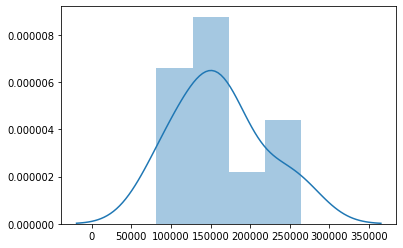

In [222]:
#plt.legend()
sns.distplot(new_2015)
#sns.distplot(inhabitants_per_district_16)



In [224]:
#Neighbourhood data revisited
#df_all.head()
new_2015_beighbourhood = df_all.dropna()['2015']
new_2015_beighbourhood.head()
#new_2016_beighbourhood = df_all.dropna()['2016']
#new_2016_beighbourhood.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Població,Índex RFD Barcelona = 100
el Raval,2015,1,Ciutat Vella,1,47617,75.8
el Barri Gòtic,2015,1,Ciutat Vella,2,15269,108.5
la Barceloneta,2015,1,Ciutat Vella,3,15036,76.6
"Sant Pere, Santa Caterina i la Ribera",2015,1,Ciutat Vella,4,22305,96.4
el Fort Pienc,2015,2,Eixample,5,31645,104.8


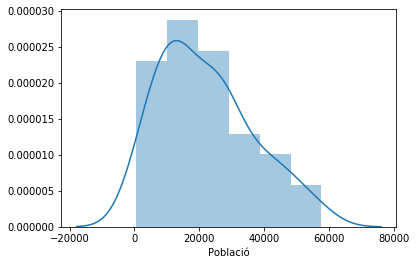

In [195]:
sns.distplot(new_2015_beighbourhood['Població'])

In [225]:
#vraiance per district, 2015
np.var(new_2015_district)



total_pop    2.840448e+09
dtype: float64

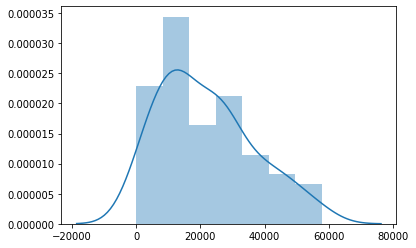

In [226]:
sns.distplot(inhabitants_per_neihborhood_15)
#sns.distplot(inhabitants_per_neihborhood_16)

In [227]:
#vraiance per neighborhood, 2015

np.var(new_2015_beighbourhood['Població']) 


208488986.07205856

In [228]:
# Discuss the results observed
#compare the variance between neighbourhood and district

np.var(new_2015_district) - np.var(new_2015_beighbourhood['Població']) 

#Variance for the populations per district is bigger, suggesting that the population in Barcelona distributes more equally 
#between districts than neighbourhoods

total_pop    2.631959e+09
dtype: float64

In [ ]:
#Exercise 3. Could you give us the values of the Q1, median and Q3 from the list of values of the number of inhabitants per neighborhood in 2015? 
#Can you see differences on the distributions between 2015 and 2016 in a boxplot?


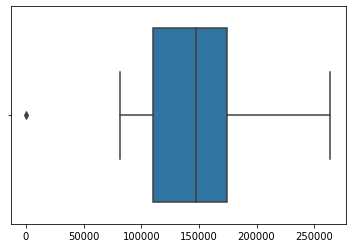

In [231]:
#Show boxplot for 2015
sns.boxplot(df_all_district['2015'])

In [213]:
#What are, approximately, the values of Q1, median and Q3?
df_all_district['2015'].median(axis = 1, skipna = True) 

Ciutat Vella           100227.0
Eixample               263991.0
Gràcia                 120676.0
Horta-Guinardó         167318.0
Les Corts               81694.0
No consta                   1.0
Nou Barris             165404.0
Sant Andreu            147307.0
Sant Martí             234124.0
Sants-Montjuïc         181307.0
Sarrià-Sant Gervasi    147501.0
dtype: float64

In [233]:
Q1_2015 = np.percentile(df_all_district['2015'], [25])
Q1_2015

array([110451.5])

In [241]:
Q3_2015 = np.percentile(df_all_district['2015'], [75])
Q3_2015

array([174312.5])

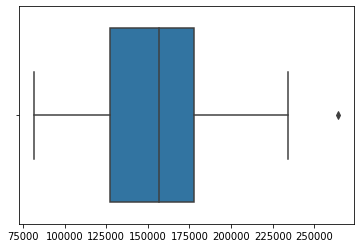

In [240]:
#Show boxplot for 2016
sns.boxplot(df_all_district['2016'])

In [236]:
#What are, approximately, the values of Q1, median and Q3?
df_all_district['2016'].median(axis = 1, skipna = True) 

/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Ciutat Vella           100451.0
Eixample               264487.0
Gràcia                 120907.0
Horta-Guinardó         167571.0
Les Corts               81708.0
No consta                   NaN
Nou Barris             164971.0
Sant Andreu            146706.0
Sant Martí             234292.0
Sants-Montjuïc         181162.0
Sarrià-Sant Gervasi    148172.0
dtype: float64

In [238]:
Q1_2016 = np.nanpercentile(df_all_district['2016'], [25])
Q1_2016

array([127356.75])

In [239]:
Q3_2016 = np.nanpercentile(df_all_district['2016'], [75])
Q3_2016

array([177764.25])

In [ ]:
#2015: Q1 array([110451.5]),  Q3 array([174312.5])
#2016: Q1 array([127356.75]), Q3 array([177764.25])
#Difference between Q3: 3451.75 and Q1: 16905.25